In [4]:
#LOAD LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [5]:
#LOAD DATA SET
df=pd.read_csv('FoodBalanceSheets_E_Africa_NOFLAG.csv', encoding='latin-1' )
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [159]:
#create a function to clean the Element column
def clean_row(row):
    if '(' in row:
        return row.split('(')[0]
    elif '-'in row:
        return row.split('-')[0]
    else:
        return row

In [160]:
df['Element']=df['Element'].apply(clean_row)

In [161]:
df['Element'].unique()

array(['Total Population ', 'Domestic supply quantity', 'Food supply ',
       'Protein supply quantity ', 'Fat supply quantity ', 'Production',
       'Import Quantity', 'Stock Variation', 'Export Quantity', 'Feed',
       'Seed', 'Losses', 'Processing', 'Other uses ', 'Residuals', 'Food',
       'Food supply quantity ', 'Tourist consumption'], dtype=object)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [163]:
# TOTAL NUMBER OF NULL VALUES IN 2014
df['Y2014'].isna().sum()

1589

In [164]:
#PERCENTAGE OF NULL VALUE
df['Y2014'].isna().sum()/len(df)*100

2.6073544131401474

In [168]:
# check for correlation of year that is mostly correlated with Element Code
df.corr()['Element Code'].sort_values(ascending = False)
#Y2014 is mostly correlated with Element Code

Element Code    1.000000
Y2014           0.024457
Y2018           0.024279
Y2017           0.024254
Y2015           0.023889
Y2016           0.023444
Area Code      -0.000209
Item Code      -0.024683
Name: Element Code, dtype: float64

In [112]:
# check for % null in a column
(df.isna().sum()/len(df))*100
# since the percentage of null is very low i will suggest we drop null

Area Code       0.000000
Area            0.000000
Item Code       0.000000
Item            0.000000
Element Code    0.000000
Element         0.000000
Unit            0.000000
Y2014           2.607354
Y2015           2.540078
Y2016           2.518747
Y2017           2.471162
Y2018           2.356300
dtype: float64

In [113]:
# check for duplicate
df.duplicated().sum()
# no duplicate in the data set

0

In [114]:
# check for number of unique values in each column
df.nunique()

Area Code         49
Area              49
Item Code        122
Item             119
Element Code      18
Element           18
Unit               5
Y2014           4493
Y2015           4520
Y2016           4520
Y2017           4537
Y2018           4591
dtype: int64

In [115]:
#drop the null value
df.dropna(inplace=True)

In [116]:
# Test
df.isna().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y2014           0
Y2015           0
Y2016           0
Y2017           0
Y2018           0
dtype: int64

In [117]:
df.loc[df['Y2014']==0.00]

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.0,0.0,0.0,0.0,0.0
21,4,Algeria,2905,Cereals - Excluding Beer,5170,Residuals,1000 tonnes,0.0,0.0,0.0,0.0,-8.0
35,4,Algeria,2511,Wheat and products,5131,Processing,1000 tonnes,0.0,0.0,0.0,0.0,0.0
37,4,Algeria,2511,Wheat and products,5170,Residuals,1000 tonnes,0.0,0.0,0.0,0.0,-8.0
43,4,Algeria,2805,Rice and products,5511,Production,1000 tonnes,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60930,181,Zimbabwe,2680,Infant food,664,Food supply,kcal/capita/day,0.0,0.0,0.0,0.0,0.0
60931,181,Zimbabwe,2680,Infant food,674,Protein supply quantity,g/capita/day,0.0,0.0,0.0,0.0,0.0
60932,181,Zimbabwe,2680,Infant food,684,Fat supply quantity,g/capita/day,0.0,0.0,0.0,0.0,0.0
60934,181,Zimbabwe,2899,Miscellaneous,5072,Stock Variation,1000 tonnes,0.0,0.0,0.0,-4.0,0.0


Select columns ‘Y2017’ and ‘Area’, Perform a groupby operation on ‘Area’.  Which of these Areas had the highest sum in 2017?

In [192]:
a=df.groupby('Area').Y2017.sum()
a=a.reset_index(name='sum')
a.sort_values(by='sum', ascending=False)

,Area,sum
34,Nigeria,1483268.23
13,Egypt,866379.92
40,South Africa,517590.54
15,Ethiopia,448683.76
30,Morocco,388495.36
19,Ghana,337599.06
0,Algeria,325644.27
46,United Republic of Tanzania,322616.85
22,Kenya,264660.66
41,Sudan,239931.92


elect columns ‘Y2017’ and ‘Area’, Perform a groupby operation on ‘Area’.  Which of these Areas had the 7th lowest sum in 2017?

In [194]:
a=df.groupby('Area').Y2017.sum()
a=a.reset_index(name='sum')
a.sort_values(by='sum', ascending=False)[-7:]
# Guinea-Bissau is the Country with least 7th sum

,Area,sum
21,Guinea-Bissau,19102.77
5,Cabo Verde,14650.74
36,Sao Tome and Principe,12662.63
38,Seychelles,442.34
9,Comoros,59.84
42,Sudan (former),0.00
16,Ethiopia PDR,0.00


In [1]:
# ele=df.groupby('Element').sum()
# ele

In [203]:
# Madagascar
x=df[df['Area']=='Madagascar']
x.groupby(['Area','Element'])['Y2015'].sum()

Area        Element                 
Madagascar  Domestic supply quantity    31214.98
            Export Quantity               494.75
            Fat supply quantity            91.85
            Feed                         2070.22
            Food                        21120.65
            Food supply                  7685.00
            Food supply quantity          871.59
            Import Quantity              1721.80
            Losses                       2176.00
            Other uses                   3957.12
            Processing                   1803.00
            Production                  29482.89
            Protein supply quantity       173.05
            Residuals                    -616.00
            Seed                          699.00
            Stock Variation              -505.00
            Total Population            24234.00
Name: Y2015, dtype: float64

In [187]:
# The YEAR WITH HIGHEST WINE 
y=df[df['Item']=='Wine']
y.groupby(['Item']).sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,,,,
Wine,66206,1319535,1818328,4497.36,4251.81,3872.09,4178.02,4039.32


In [189]:
# The YEAR WITH HIGHEST WINE 
p=df[df['Element']=='Stock Variation']
p.groupby(['Element']).sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Stock Variation,571566,11329527,21464704,58749.83,34910.99,33140.12,54316.91,20577.91


In [149]:
df.groupby('Item').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,,,,
"Alcohol, Non-Food",35230,693999,1389590,2329.00,2119.00,2164.00,2299.00,2285.00
Alcoholic Beverages,73136,1616972,2110145,102391.11,98774.72,96939.75,95572.06,97842.27
Animal Products,18060,397035,90990,11935.65,11811.73,11661.69,11547.65,11578.61
Animal fats,83742,1847142,2497151,209460.54,200675.72,183314.22,269617.53,269648.27
Apples and products,67924,1321585,1849486,9499.23,10559.15,9850.26,10197.90,9640.51
...,...,...,...,...,...,...,...,...
"Vegetables, Other",75817,1474430,2179992,155038.96,158104.08,156209.90,157749.59,163978.21
Vegetal Products,18060,391905,90990,107145.19,107064.17,106792.72,107655.20,107775.39
Wheat and products,85608,1607040,2583023,232670.13,234710.51,239377.07,240047.62,242645.19


In [153]:
#Calculate the STD OF the whole dataset with Y2017
df.Y2017.std()

1695.4364478982814

In [154]:
#Calculate the Mean OF the whole dataset with Y2017
df.Y2017.mean()

144.9277895265082

In [118]:
number_col=df.select_dtypes('number').columns
number_col

Index(['Area Code', 'Item Code', 'Element Code', 'Y2014', 'Y2015', 'Y2016',
       'Y2017', 'Y2018'],
      dtype='object')

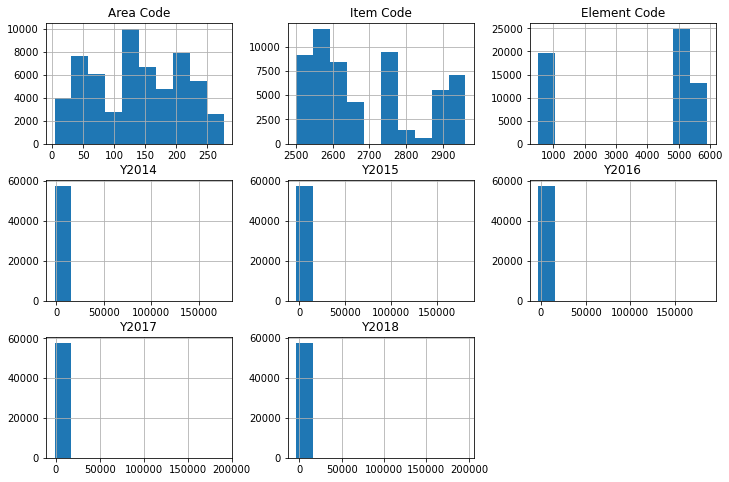

In [119]:
df[number_col].hist(figsize=(12,8));

In [120]:
def check_skew():
    """Let check for skewedness the columns of the data frame"""
    skew_value=[]
    
    for col in df.select_dtypes('number'):
        skew_col=df[col].skew()
        skew_value.append((col, skew_col))
    return sorted(skew_value, key= lambda x: x[1], reverse=True)

In [121]:
check_skew()[:5]

[('Y2016', 52.70744902447701),
 ('Y2018', 51.934572039659315),
 ('Y2017', 51.88437610442621),
 ('Y2015', 51.639891318530985),
 ('Y2014', 51.05327924805362)]

In [122]:
df.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000
mean,134.499342,2690.495656,3745.422868,137.831770,138.990488,140.376380,144.927790,148.027664
std,72.651212,146.625825,2217.914615,1588.660769,1625.441821,1662.732983,1695.436448,1735.920219
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2563.000000,674.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2633.000000,5142.000000,0.140000,0.130000,0.130000,0.160000,0.130000
75%,196.000000,2781.000000,5301.000000,9.000000,9.000000,9.000000,10.000000,10.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000
